In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carregue os dados do arquivo CSV
data = pd.read_csv('TrafegoFiltrado3.csv', sep=',', encoding='ISO 8859-1', engine='python')

In [3]:
data.head(1000)

No.      Time           Source    Destination Protocol  Length  \
0       1  0.000000  132.147.233.145  172.28.212.82      TCP    1514   
1       2  0.000012  132.147.233.145  172.28.212.82      TCP    1514   
2       3  0.000025  132.147.233.145  172.28.212.82      TCP    1514   
3       4  0.000037  132.147.233.145  172.28.212.82      TCP    1514   
4       5  0.000049  132.147.233.145  172.28.212.82      TCP    1514   
..    ...       ...              ...            ...      ...     ...   
995  1002  0.054586    13.182.170.12  172.28.61.187      TCP    1306   
996  1003  0.054599    13.182.170.12  172.28.61.187      TCP    1514   
997  1004  0.054600    172.28.61.187  13.182.170.12      TCP      66   
998  1005  0.054601    13.182.170.12  172.28.61.187      TCP     274   
999  1006  0.054604    172.28.61.187  13.182.170.12      TCP      66   

                                                  Info    Win  Source_Port  \
0    80  >  40343 [ACK] Seq=1 Ack=1 Win=46 Len=1448...     46           80   
1    80  >  40343 [ACK] Seq=1449 Ack=1 Win=46 Len=1...     46           80   
2    80  >  40343 [ACK] Seq=2897 Ack=1 Win=46 Len=1...     46           80   
3    80  >  40343 [ACK] Seq=4345 Ack=1 Win=46 Len=1...     46           80   
4    80  >  40343 [ACK] Seq=5793 Ack=1 Win=46 Len=1...     46           80   
..                                                 ...    ...          ...   
995  80  >  39532 [ACK] Seq=193209 Ack=29 Win=5888 ...   5888           80   
996  80  >  39532 [ACK] Seq=194449 Ack=29 Win=5888 ...   5888           80   
997  39532  >  80 [ACK] Seq=29 Ack=181625 Win=64128...  64128        39532   
998  80  >  39532 [ACK] Seq=195897 Ack=29 Win=5888 ...   5888           80   
999  39532  >  80 [ACK] Seq=29 Ack=184521 Win=64128...  64128        39532   

     Destination_Port   Flag  
0               40343  0x010  
1               40343  0x010  
2               40343  0x010  
3               40343  0x010  
4               40343  0x010  
..                ...    ...  
995             39532  0x010  
996             39532  0x010  
997                80  0x010  
998             39532  0x010  
999                80  0x010  

[1000 rows x 11 columns]

In [4]:
dataframes = []
dataframes.append(data)

In [5]:
data = pd.concat(dataframes, axis=0)

In [17]:
# Aqui é realizado o filtro, para que. Ao chegar no aprendizado ele separar em uma tabela 'label' se for diferente da janela 32120 ele é nomeado como 1, caso contrátio é declarado como ataque
# igual a 0.
data['label'] = 0
data.loc[data['Win'] != 32120, 'label'] = 1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257476 entries, 0 to 1257475
Data columns (total 12 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   No.               1257476 non-null  int64  
 1   Time              1257476 non-null  float64
 2   Source            1257476 non-null  object 
 3   Destination       1257476 non-null  object 
 4   Protocol          1257476 non-null  object 
 5   Length            1257476 non-null  int64  
 6   Info              1257476 non-null  object 
 7   Win               1257476 non-null  int64  
 8   Source_Port       1257476 non-null  int64  
 9   Destination_Port  1257476 non-null  int64  
 10  Flag              1257476 non-null  object 
 11  label             1257476 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 115.1+ MB


In [9]:
# Aqui é ralizado o filtro dos dados, para remover impurezas como pontos finais nas tabelas Source e Destination e 'x' da Flag
data["Flag"] = data["Flag"].str.replace("x", "")
data["Source"] = data["Source"].str.replace(".", "")
data["Destination"] = data["Destination"].str.replace(".", "")
data.head()

No.      Time        Source Destination Protocol  Length  \
0    1  0.000000  132147233145  1722821282      TCP    1514   
1    2  0.000012  132147233145  1722821282      TCP    1514   
2    3  0.000025  132147233145  1722821282      TCP    1514   
3    4  0.000037  132147233145  1722821282      TCP    1514   
4    5  0.000049  132147233145  1722821282      TCP    1514   

                                                Info  Win  Source_Port  \
0  80  >  40343 [ACK] Seq=1 Ack=1 Win=46 Len=1448...   46           80   
1  80  >  40343 [ACK] Seq=1449 Ack=1 Win=46 Len=1...   46           80   
2  80  >  40343 [ACK] Seq=2897 Ack=1 Win=46 Len=1...   46           80   
3  80  >  40343 [ACK] Seq=4345 Ack=1 Win=46 Len=1...   46           80   
4  80  >  40343 [ACK] Seq=5793 Ack=1 Win=46 Len=1...   46           80   

   Destination_Port  Flag  label  
0             40343  0010      1  
1             40343  0010      1  
2             40343  0010      1  
3             40343  0010      1  
4             40343  0010      1

In [10]:
data.head(99)

No.      Time        Source Destination Protocol  Length  \
0     1  0.000000  132147233145  1722821282      TCP    1514   
1     2  0.000012  132147233145  1722821282      TCP    1514   
2     3  0.000025  132147233145  1722821282      TCP    1514   
3     4  0.000037  132147233145  1722821282      TCP    1514   
4     5  0.000049  132147233145  1722821282      TCP    1514   
..  ...       ...           ...         ...      ...     ...   
94   95  0.010144      77112238   172287391      TCP    1514   
95   96  0.010148     172287391    77112238      TCP      66   
96   97  0.010156      77112238   172287391      TCP    1514   
97   98  0.010169      77112238   172287391      TCP    1514   
98   99  0.010181      77112238   172287391      TCP    1514   

                                                 Info    Win  Source_Port  \
0   80  >  40343 [ACK] Seq=1 Ack=1 Win=46 Len=1448...     46           80   
1   80  >  40343 [ACK] Seq=1449 Ack=1 Win=46 Len=1...     46           80   
2   80  >  40343 [ACK] Seq=2897 Ack=1 Win=46 Len=1...     46           80   
3   80  >  40343 [ACK] Seq=4345 Ack=1 Win=46 Len=1...     46           80   
4   80  >  40343 [ACK] Seq=5793 Ack=1 Win=46 Len=1...     46           80   
..                                                ...    ...          ...   
94  80  >  50557 [ACK] Seq=69505 Ack=28 Win=5888 L...   5888           80   
95  50557  >  80 [ACK] Seq=28 Ack=60817 Win=61440 ...  61440        50557   
96  80  >  50557 [PSH, ACK] Seq=70953 Ack=28 Win=5...   5888           80   
97  80  >  50557 [ACK] Seq=72401 Ack=28 Win=5888 L...   5888           80   
98  80  >  50557 [ACK] Seq=73849 Ack=28 Win=5888 L...   5888           80   

    Destination_Port  Flag  label  
0              40343  0010      1  
1              40343  0010      1  
2              40343  0010      1  
3              40343  0010      1  
4              40343  0010      1  
..               ...   ...    ...  
94             50557  0010      1  
95                80  0010      1  
96             50557  0018      1  
97             50557  0010      1  
98             50557  0010      1  

[99 rows x 12 columns]

In [11]:
# Acessar a coluna, e dentro dela buscar o texto 'win=' , se conseguir caçar o item da coluna, (filtrar o 'Length' e tirar o '>'. o 'time' é muito importante, lista de tabelas importantes(No, Time, Source, Destination))

In [13]:
# Aqui é realizado o 'drop' das tabelas que não serão utilizadas, Info e Protocol
data = data.drop('Info', axis=1)
data = data.drop('Protocol', axis=1)
data.head()

KeyError: "['Info'] not found in axis"

In [14]:
#A partir daqui é realizado a conversão de paramentro de int para float geral.
data["No."] = pd.to_numeric(data["No."], downcast='float')
data["Source"] = pd.to_numeric(data["Source"], downcast='float')
data["Destination"] = pd.to_numeric(data["Destination"], downcast='float')
data["Length"] = pd.to_numeric(data["Length"], downcast='float')
data["Win"] = pd.to_numeric(data["Win"], downcast='float')
data["Source_Port"] = pd.to_numeric(data["Source_Port"], downcast='float')
data["Destination_Port"] = pd.to_numeric(data["Destination_Port"], downcast='float')
data["Flag"] = pd.to_numeric(data["Flag"], downcast='float')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257476 entries, 0 to 1257475
Data columns (total 10 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   No.               1257476 non-null  float32
 1   Time              1257476 non-null  float64
 2   Source            1257476 non-null  float64
 3   Destination       1257476 non-null  float64
 4   Length            1257476 non-null  float32
 5   Win               1257476 non-null  float32
 6   Source_Port       1257476 non-null  float32
 7   Destination_Port  1257476 non-null  float32
 8   Flag              1257476 non-null  float32
 9   label             1257476 non-null  int64  
dtypes: float32(6), float64(3), int64(1)
memory usage: 67.2 MB


<Axes: xlabel='Source', ylabel='Destination'>

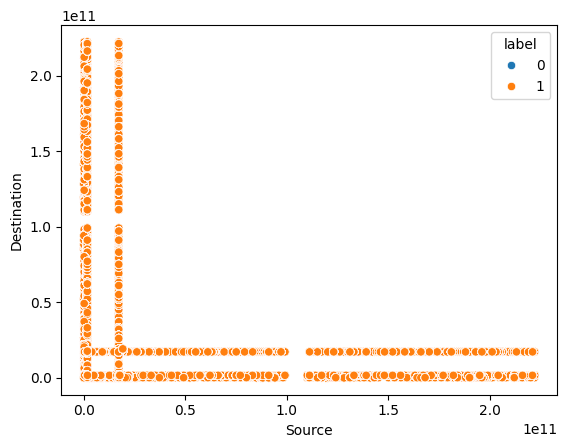

In [18]:
# Será realizado o primeiro gráfico mostrando ataques e nao_ataques como destination e Source
sns.scatterplot(data=data,x='Source', y='Destination', hue='label')


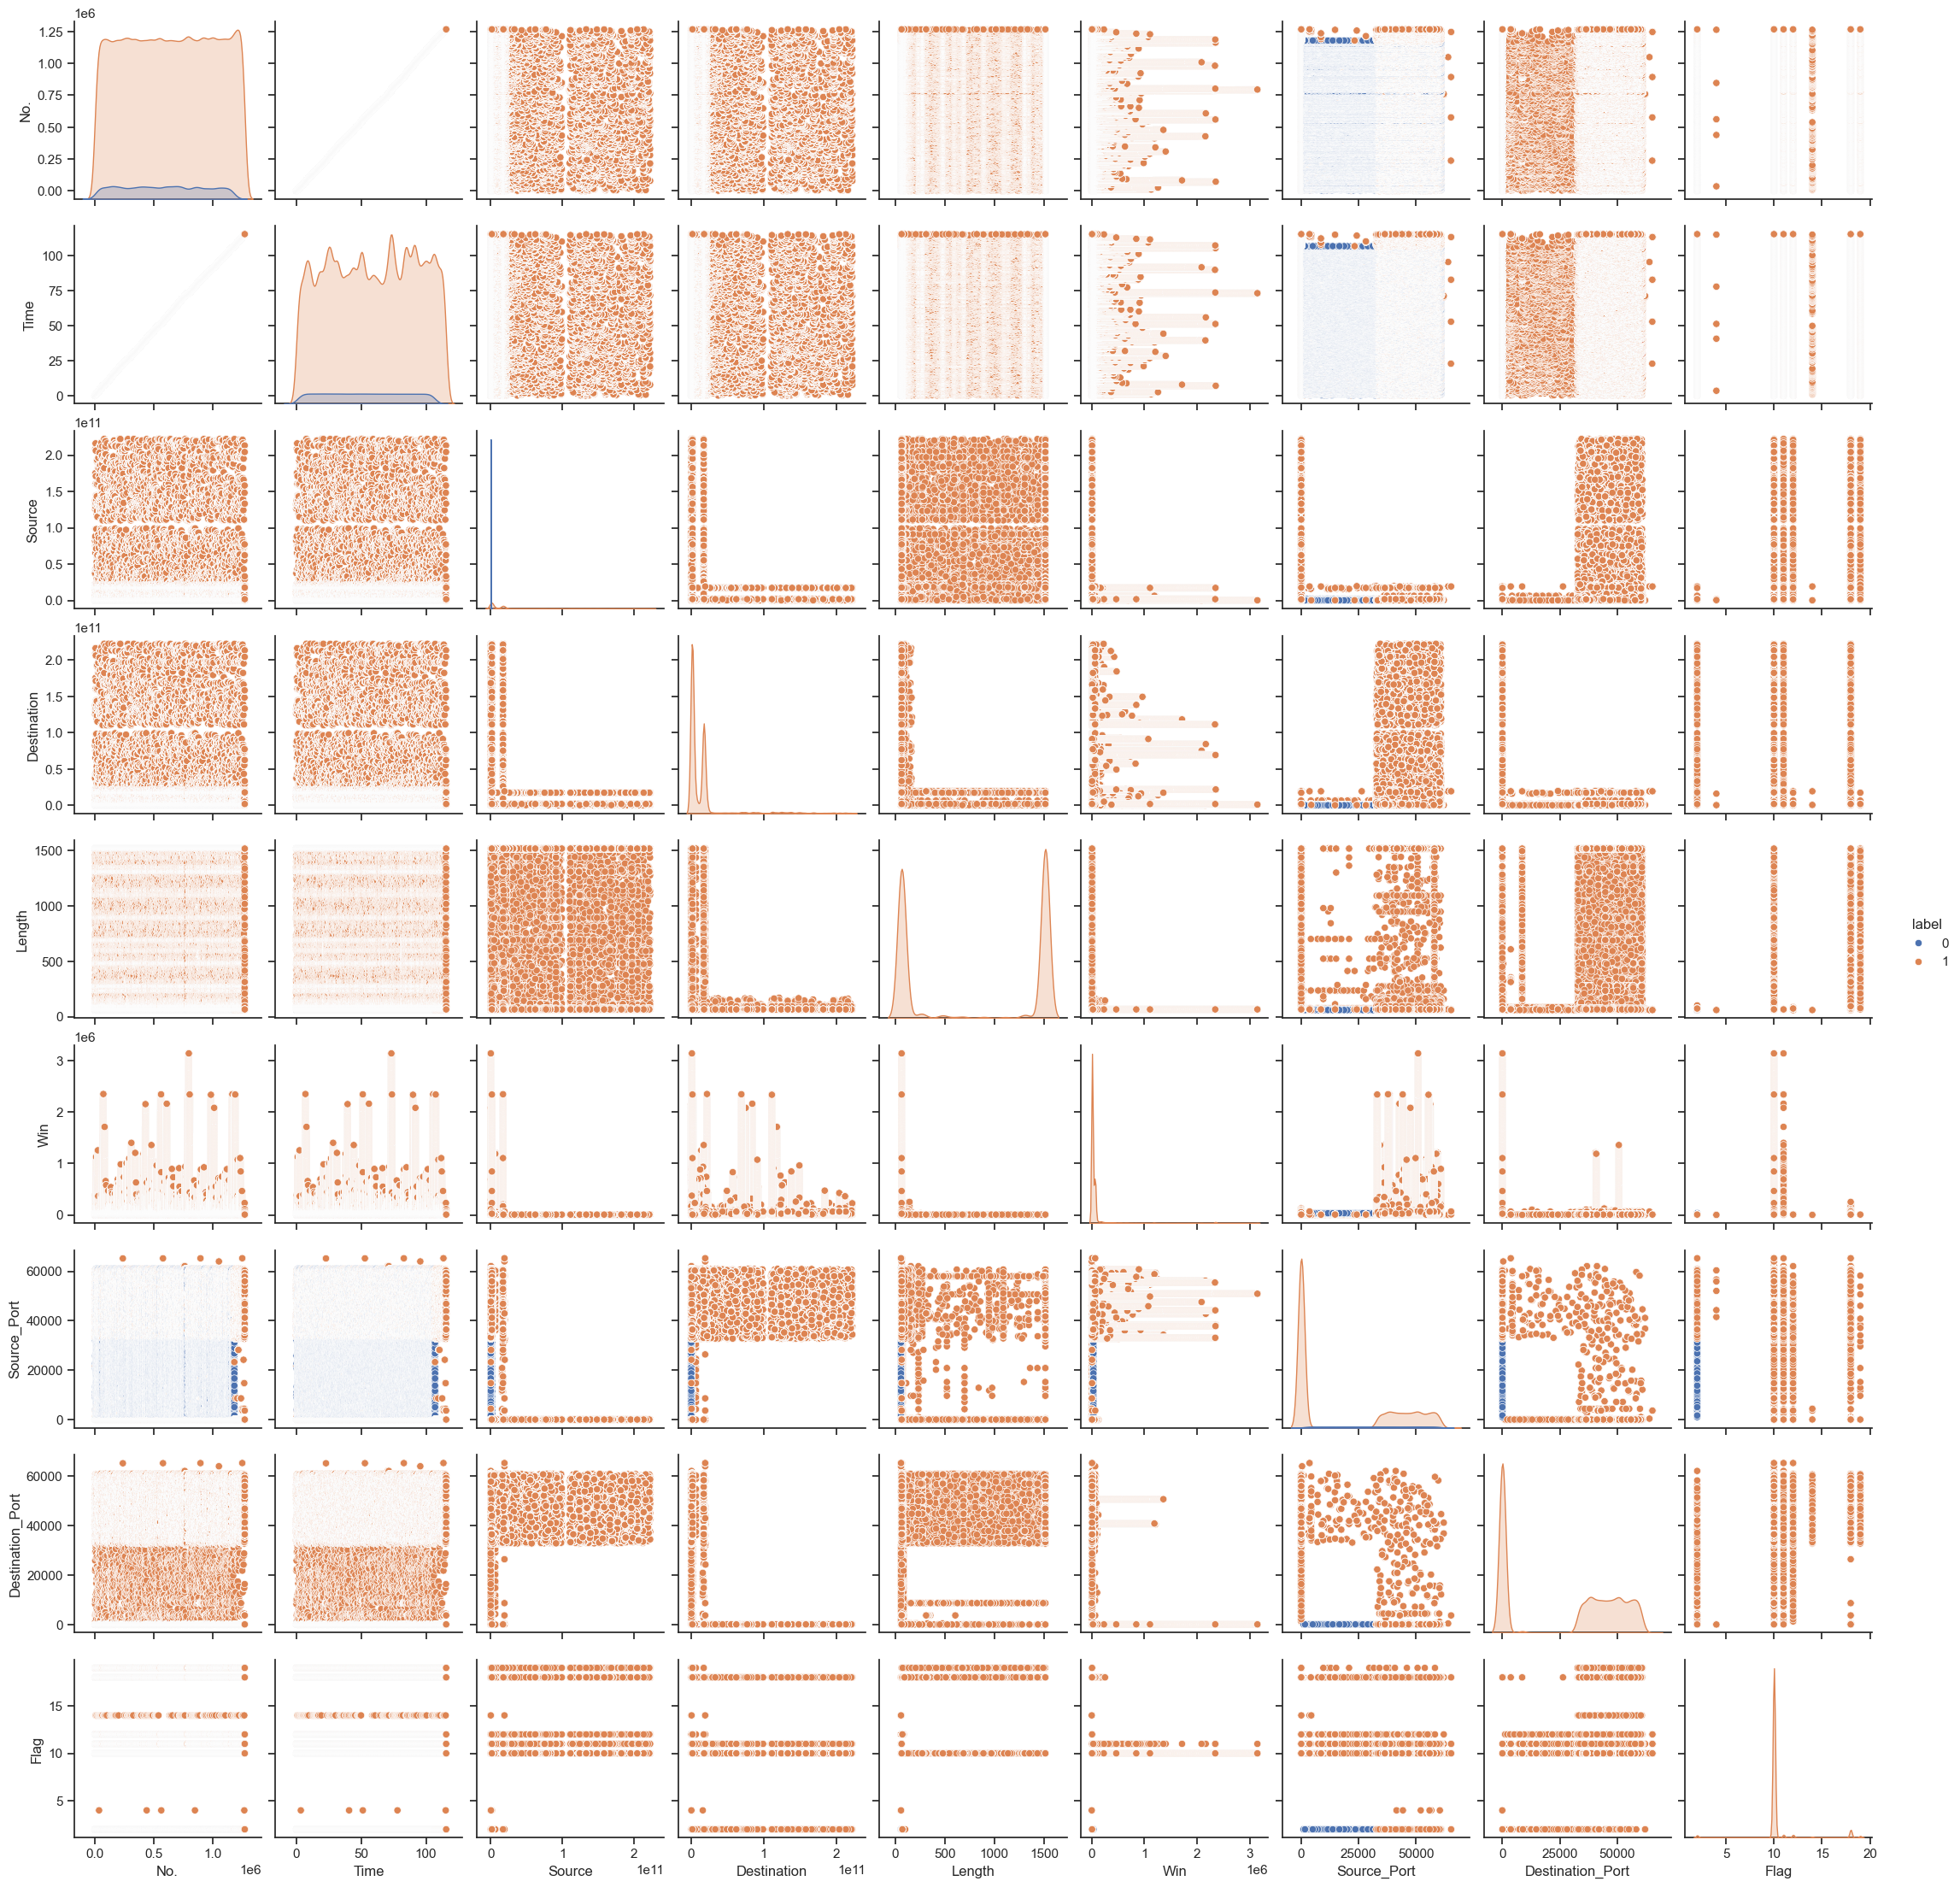

In [39]:
# Aqui é a parte mais demorada de todo o código, aonde é gerado todas as possibilidades em gráficos e mostra os IP's inocentes e atacantes
sns.set_theme(style="ticks")
g = sns.pairplot(data, hue="label")

In [40]:
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])  # Substitua 'Source' pelo nome da coluna categórica



In [41]:
X = data.drop(['label'], axis=1)  # Remova 'Protocol' original após one-hot encoding
y = data['label']

In [42]:
X.head()

No.      Time        Source   Destination  Length   Win  Source_Port  \
0  1.0  0.000000  1.321472e+11  1.722821e+09  1514.0  46.0         80.0   
1  2.0  0.000012  1.321472e+11  1.722821e+09  1514.0  46.0         80.0   
2  3.0  0.000025  1.321472e+11  1.722821e+09  1514.0  46.0         80.0   
3  4.0  0.000037  1.321472e+11  1.722821e+09  1514.0  46.0         80.0   
4  5.0  0.000049  1.321472e+11  1.722821e+09  1514.0  46.0         80.0   

   Destination_Port  Flag  
0           40343.0  10.0  
1           40343.0  10.0  
2           40343.0  10.0  
3           40343.0  10.0  
4           40343.0  10.0

In [43]:
X = data.drop('label', axis=1)
y = data['label']

In [44]:
valor_preenchimento = 0
data['label'].fillna(valor_preenchimento, inplace=True)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
k = 9  # Valor de K (número de vizinhos)
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [51]:
y_pred = knn.predict(X_test)

In [52]:
confusion = confusion_matrix(y_test, y_pred)

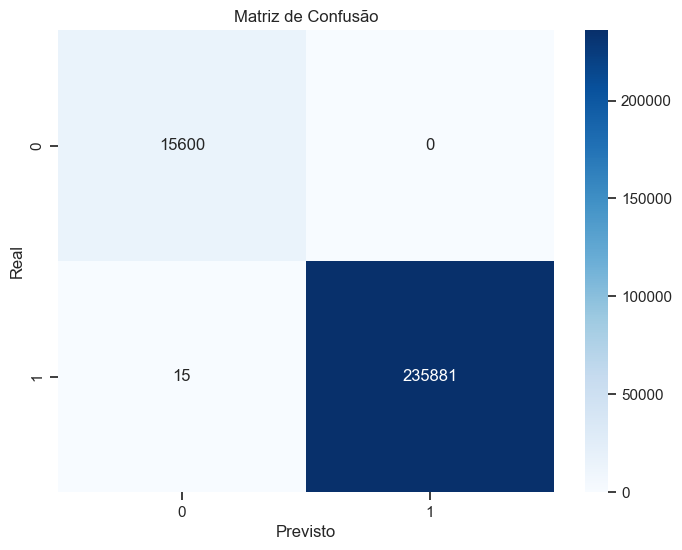

In [53]:
# Aqui faz a Matriz de confusão e mostra o que ele errou e o que acertou.
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()